In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 6)})

In [27]:
df = pd.read_csv('Статистика за 2018 год.csv', encoding = "cp1251")

### Задание 1

Сотрудник службы оценки качества продукции заметил, что число бракованных листов
стали в партии для стали марки A больше, чем для стали марки B. 

Также он обратил внимание, что при средней скорости прокатки более 4 м/с число бракованных листов
больше. В соответствии с этими наблюдениями, предлагается снизить скорость прокатки
и ввести дополнительные меры контроля качества для стали марки A.

Обоснуйте, что:

1) Более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B.

2) При скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки.

Данные, необходимые для анализа, содержатся в файле «Статистика за 2018 год».
Количество листов стали в каждой партии предполагается одинаковым.

In [28]:
df

,Число бракованных листов,Скорость прокатки,Марка стали
0,3,3.8,A
1,3,3.8,B
2,3,4.8,B
3,4,4.4,B
4,6,5.0,B
...,...,...,...
232,1,4.7,A
233,3,3.4,A
234,2,5.5,A
235,3,5.0,B


In [56]:
# Давайте перепроверим первое условие задачи, не обманул ли нас сотрудник
sum_of_defective_A = df['Число бракованных листов'][df['Марка стали'] == 'A'].sum()
sum_of_defective_B = df['Число бракованных листов'][df['Марка стали'] == 'B'].sum()
print(f"В марке стали A число бракованных листов составляет: {sum_of_defective_A},"
      f"а в марке стали B: {sum_of_defective_B}.")
if sum_of_defective_A > sum_of_defective_B:
    print('Сотрудник нас не обманул.')
else:
    print('Сотрудник что-то не договаривает.')

В марке стали A число бракованных листов составляет: 442,а в марке стали B: 330.
Сотрудник нас не обманул.


In [57]:
# Давайте перепроверим второе условие задачи, не обманул ли нас сотрудник ещё раз
sum_of_defective_bigger_4velocity = df['Число бракованных листов'][df['Скорость прокатки'] > 4].sum()
sum_of_defective_not_bigger_4velocity = df['Число бракованных листов'][df['Скорость прокатки'] <= 4].sum()
print(f"Число бракованных листов со скоростью больше 4 составляет: {sum_of_defective_bigger_4velocity},"
      f"а со скоростью 4 и ниже : {sum_of_defective_not_bigger_4velocity}.")
if sum_of_defective_bigger_4velocity > sum_of_defective_not_bigger_4velocity:
    print('Сотрудник нас не обманул')
else:
    print('Сотрудник что-то не договаривает.')

Число бракованных листов со скоростью больше 4 составляет: 594,а со скоростью 4 и ниже : 178.
Сотрудник нас не обманул


### Обоснуем, что

Более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B.

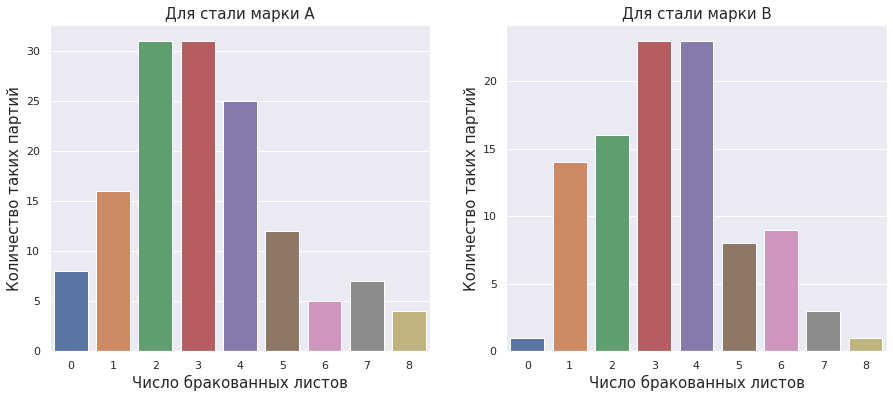

In [116]:
fig, (ax1, ax2) =plt.subplots(1,2)
ax1 = sns.countplot(x="Число бракованных листов", data=df[df['Марка стали'] == 'A'], ax=ax1)
ax1.set_title('Для стали марки А', size=15)
ax1.set_xlabel('Число бракованных листов', size=15)
ax1.set_ylabel('Количество таких партий', size=15)
ax2 = sns.countplot(x="Число бракованных листов", data=df[df['Марка стали'] == 'B'], ax=ax2)
ax2.set_title('Для стали марки B', size=15)
ax2.set_xlabel('Число бракованных листов', size=15)
ax2.set_ylabel('Количество таких партий', size=15)
plt.show()

Графики не дают точную картину, перепровим на цифрах.

In [145]:
count_of_defective_lists_bigger_3_A = df['Число бракованных листов'][(df['Марка стали'] == 'A')
                                                          & (df['Число бракованных листов'] > 3)].count()
count_of_defective_lists_bigger_3_B = df['Число бракованных листов'][(df['Марка стали'] == 'B')
                                                          & (df['Число бракованных листов'] > 3)].count()
print(f"Количество партий, где более 3 брокованных листов для стали марки А"
      f": {count_of_defective_lists_bigger_3_A},\n"
      f"Количество партий, где более 3 брокованных листов для стали марки B"
      f": {count_of_defective_lists_bigger_3_B}.")
print('-----------------------------------------------------------------------------------------------------------')
if count_of_defective_lists_bigger_3_A > count_of_defective_lists_bigger_3_B:
    print('Количество партий, где более 3 брокованных листов на партию, больше у стали марки А, чем В.')
else:
    print('Количество партий, где более 3 брокованных листов на партию, больше у стали марки B, чем A.')
print('-----------------------------------------------------------------------------------------------------------')
if count_of_defective_lists_bigger_3_A > 2 * count_of_defective_lists_bigger_3_B:
    print('Преимущество таких случаев как минимум в 2 раза')
else:
    ratio = count_of_defective_lists_bigger_3_A/count_of_defective_lists_bigger_3_B
    print('Но преимущества как такового нет. Их больше всего в %.3f раз. ' %ratio  +
          'Поэтому мы не можем говорить о значимом отрыве.')

Количество партий, где более 3 брокованных листов для стали марки А: 53,
Количество партий, где более 3 брокованных листов для стали марки B: 44.
-----------------------------------------------------------------------------------------------------------
Количество партий, где более 3 брокованных листов на партию, больше у стали марки А, чем В.
-----------------------------------------------------------------------------------------------------------
Но преимущества как такового нет. Их больше всего в 1.205 раз. Поэтому мы не можем говорить о значимом отрыве.


### Обоснуем, что

При скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки.

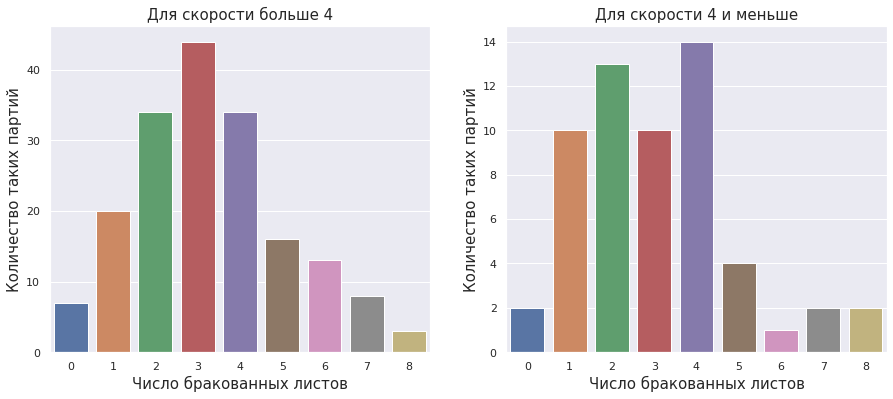

In [147]:
fig, (ax1, ax2) =plt.subplots(1,2)
ax1 = sns.countplot(x="Число бракованных листов", data=df[df['Скорость прокатки'] > 4], ax=ax1)
ax1.set_title('Для скорости больше 4', size=15)
ax1.set_xlabel('Число бракованных листов', size=15)
ax1.set_ylabel('Количество таких партий', size=15)
ax2 = sns.countplot(x="Число бракованных листов", data=df[df['Скорость прокатки'] <= 4], ax=ax2)
ax2.set_title('Для скорости 4 и меньше', size=15)
ax2.set_xlabel('Число бракованных листов', size=15)
ax2.set_ylabel('Количество таких партий', size=15)
plt.show()

In [166]:
count_of_defective_lists_bigger_3_4velocity = df['Число бракованных листов'][(df['Скорость прокатки'] > 4)
                                                          & (df['Число бракованных листов'] > 3)].count()
count_of_defective_lists_bigger_3_not4velocity = df['Число бракованных листов'][(df['Скорость прокатки'] <= 4) & (df['Число бракованных листов'] > 3)].count()
print(f"Количество партий, где более 3 брокованных листов для скорости прокатки больше 4"
      f": {count_of_defective_lists_bigger_3_4velocity },\n"
      f"Количество партий, где более 3 брокованных листов для скорости прокатки 4 и меньше"
      f": {count_of_defective_lists_bigger_3_not4velocity }.")
print('-----------------------------------------------------------------------------------------------------------')
if count_of_defective_lists_bigger_3_4velocity > count_of_defective_lists_bigger_3_not4velocity:
    print('Количество партий, где более 3 брокованных листов на партию, больше на тех листах, где скорость '
          'прокатки больше 4.')
else:
    print('Количество партий, где более 3 брокованных листов на партию, больше на тех листах, где скорость '
          'прокатки 4 и меньше.')
print('-----------------------------------------------------------------------------------------------------------')
if count_of_defective_lists_bigger_3_4velocity  > 2 * count_of_defective_lists_bigger_3_not4velocity:
    print('Преимущество таких случаев как минимум в 2 раза.')
    ratio = count_of_defective_lists_bigger_3_4velocity / count_of_defective_lists_bigger_3_not4velocity
    print('А именно в %.3f раз. ' %ratio + 'Можно говорить о значимым влиянии этого признака.')
else:
    ratio = count_of_defective_lists_bigger_3_4velocity / count_of_defective_lists_bigger_3_not4velocity 
    print('Но преимущества как такового нет. Их больше всего в %.3f раз. ' %ratio  +
          'Поэтому мы не можем говорить о значимом отрыве.')

Количество партий, где более 3 брокованных листов для скорости прокатки больше 4: 74,
Количество партий, где более 3 брокованных листов для скорости прокатки 4 и меньше: 23.
-----------------------------------------------------------------------------------------------------------
Количество партий, где более 3 брокованных листов на партию, больше на тех листах, где скорость прокатки больше 4.
-----------------------------------------------------------------------------------------------------------
Преимущество таких случаев как минимум в 2 раза.
А именно в 3.217 раз. Можно говорить о значимым влиянии этого признака.


### Итого, сделаем вывод
Более 3 бракованных листов на партию выходит чаще для стали марки А,чем для стали марки B. Но совсем незначительно. Этот признак не является очень важным для нас. 

При скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки. Этот признак является важным для нас.

Теперь, можно смело обратиться к заводу, и посоветовать им снизить скорость прокрутки, таким образом количество брокованных листов должно сократиться